In [1]:
import pandas as pd

In [2]:
!cp ../run4-analysis/vasp_refine_data.csv ./

In [12]:
df_all = pd.read_csv('vasp_refine_data.csv')
df_pbesol = df_all[df_all.xc == 'pbesol'].copy().reset_index()
min_ids = df_pbesol.groupby('label')['energy'].idxmin()
# Remove duplicated calculaation - take the minimum energy for each label
df_pbesol_min = df_pbesol.loc[min_ids]

In [15]:
import matplotlib.pyplot as plt

In [16]:
plt.style.use('/home/bonan/.config/matplotlib/stylelib/pulication.mplstyle')

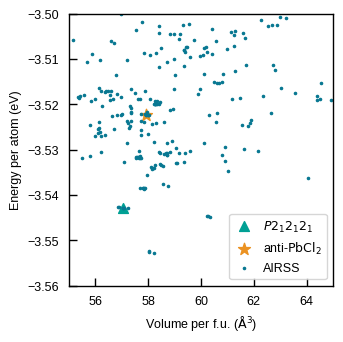

In [73]:
fig = plt.figure(dpi=100)

type_name = 'MP'
selected = df_pbesol_min[df_pbesol_min.type == type_name]
plt.scatter(selected.volume_fu, selected.energy_pa, s=50, marker='^', label=r'$P2_12_12_1$')
type_name = 'EXP'
selected = df_pbesol_min[df_pbesol_min.type == type_name]
plt.scatter(selected.volume_fu, selected.energy_pa, s=80, 
            #c='xkcd:red', 
            marker='*', label=r'anti-$\mathrm{PbCl_2}$')
type_name = 'AIRSS'
selected = df_pbesol_min[df_pbesol_min.type == type_name]
plt.scatter(selected.volume_fu, selected.energy_pa, s=10, marker='.', 
           # c='xkcd: orchid'
            label='AIRSS'
           )

plt.ylim(-3.56, -3.50)
plt.xlim(55, 65)
plt.xlabel(r'Volume per f.u. ($\mathrm{\AA^3}$)')
plt.ylabel(r'Energy per atom (eV)')
plt.legend()
plt.tight_layout()
plt.savefig('search_result.svg')